# Polynomial Regression-Temperature & Pressure

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/home/student/Downloads/polynomial.csv')
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [3]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [4]:
df.drop(['sno'],axis=1,inplace=True)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [5]:
x=df.iloc[:,:-1].values
x

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]])

In [6]:
y=df.iloc[:,-1].values
y

array([2.0e-04, 1.2e-03, 6.0e-03, 3.0e-02, 9.0e-02, 2.7e-01])

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

Text(0.5, 1.0, 'Temperature vs pressure')

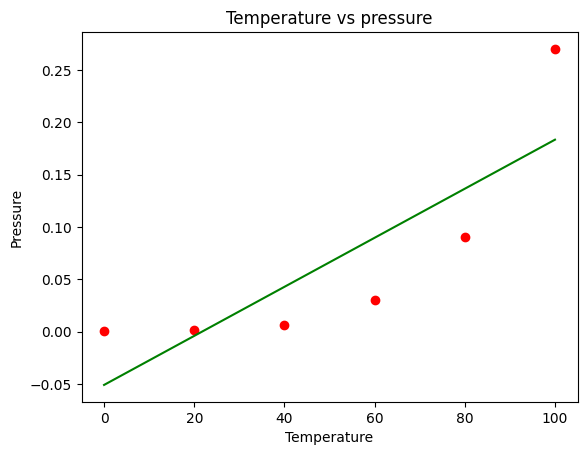

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='green')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Temperature vs pressure')

In [9]:
#intercept
print(model.intercept_)
#slope
print(model.coef_)

-0.05086666666666667
[0.002342]


In [22]:
#Performance Evaluation
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
print('error:',mean_absolute_error(y,y_pred))
print('error percentage:',mean_absolute_percentage_error(y,y_pred))
print('mse:',mean_squared_error(y,y_pred))

error: 0.047653333333333346
error percentage: 44.775078189300416
mse: 0.002870267555555557


 Error% is 44---linear regression model is not applicable

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [12]:
poly.fit(x_poly,y)
reg=LinearRegression()
reg.fit(x_poly,y)
y_poly=reg.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

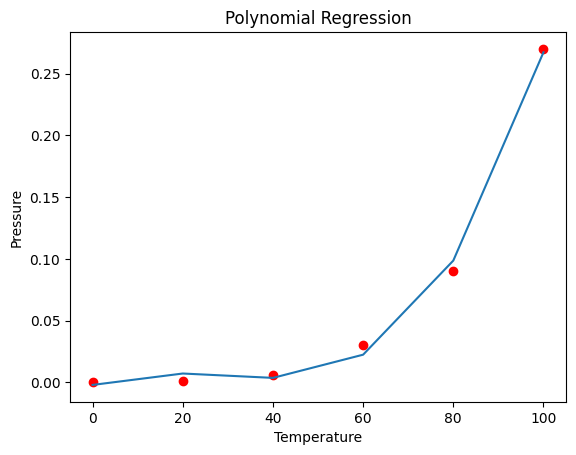

In [13]:
plt.scatter(x,y, color="red")
plt.plot(x,y_poly)
plt.title("Polynomial Regression")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()

In [17]:
df1=pd.DataFrame({'Actual values':y,'simple regression Predicted value':y_pred,'Polynomial regression predicted value':y_poly})
df1

,Actual values,simple regression Predicted value,Polynomial regression predicted value
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289


In [21]:
#Performance Evaluation
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
print('error:',mean_absolute_error(y,y_poly))
print('error percentage:',mean_absolute_percentage_error(y,y_poly))
print('mse:',mean_squared_error(y,y_poly))

error: 0.004899999999992323
error percentage: 2.7865912208923658
mse: 3.087518518518518e-05


Error% is reduced.

In [20]:
from sklearn.metrics import r2_score
print('simple LR r2_score:',r2_score(y,y_pred))
print('polynomial LR r2_score:',r2_score(y,y_poly))

simple LR r2_score: 0.690349972603981
polynomial LR r2_score: 0.9966691251761722
